In [1]:
%load_ext autoreload
%autoreload 2

# some magic to be able to import local module into jupyter notebook
# https://mg.readthedocs.io/importing-local-python-modules-from-jupyter-notebooks/index.html
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from dynamite_src import gauss_hermite_kinematics as ghk
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from astropy import table

In [2]:
np.random.seed(175346)

# setup velocity array
nv = 1000
vedg = np.linspace(-5, 5, nv+1)
v = (vedg[:-1] + vedg[1:])/2.
dv = v[1] - v[0]

# make true LOSVD
n_losvds, n_cmps = 10, 2
losvds = np.zeros((n_losvds, nv))
for i in range(n_losvds):
    weights = np.random.uniform(0.1, 1, n_cmps)
    means = np.random.uniform(-4, 4, n_cmps)
    sigmas = np.random.uniform(0.1, 1, n_cmps)    
    gmm = ghk.GauusianMixture1D(weights=weights,
                                means=means,
                                sigmas=sigmas)
    losvds[i,:] = gmm.evaluate(v)
    
orblib = ghk.Histogram(xedg=vedg, y=losvds, normalise=True)

(10,)


In [3]:
ndat = 100
dat = table.Table()
dat['v'] = np.random.uniform(-3, 3, ndat)
dat['sigma'] = np.random.uniform(0, 3, ndat)

In [4]:
gauherm = ghk.GaussHermite()

h = gauherm.get_gh_expansion_coefficients(v_mu=dat['v'],
                                          v_sig=dat['sigma'],
                                          vel_hist=orblib,
                                          max_order=10)

gh_losvds = gauherm.evaluate_losvd(orblib.x, dat['v'], dat['sigma'], h)

Plot the LOSVD of orbit $i$ and the associated GH expansion observed in aperture $j$

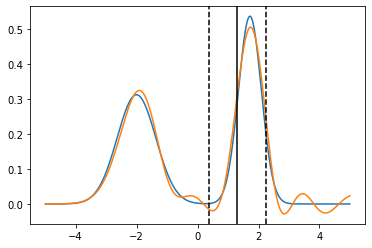

In [5]:
i_orb = 2
j_ap = 4

plt.plot(orblib.x, orblib.y[i_orb,:])
plt.plot(orblib.x, gh_losvds[i_orb, j_ap, :])
plt.axvline(dat['v'][j_ap], color='k', ls='-')
plt.axvline(dat['v'][j_ap]+dat['sigma'][j_ap], color='k', ls='--')
plt.axvline(dat['v'][j_ap]-dat['sigma'][j_ap], color='k', ls='--')